# 05.7 Ejercicio de identificación de cifras manuscritas (Información Complementaria)

In [1]:
import numpy as np
import pandas as pd
from IPython import display

In [1]:
run 05.0_RNN_Utilidades.ipynb

<Figure size 432x288 with 0 Axes>

La función __load_mnist__ devuelve dos matrices, la primera es una matriz Numpy de dimensión n x m (imágenes), donde n es el número de muestras y m es el número de características (aquí, píxeles). El conjunto de datos de entrenamiento consta de 60,000 dígitos de entrenamiento y el el conjunto de prueba contiene 10.000 muestras, respectivamente. Las imágenes en el conjunto de datos MNIST consisten en 28 x 28 píxeles, y cada píxel está representado por un valor de intensidad de escala de grises. Aquí, se estiran los 28 x 28 píxeles en vectores fila unidimensionales (784 por fila o imagen). La segunda matriz (etiquetas) devuelta por la función load_mnist contiene la variable objetivo correspondiente, las etiquetas de clase (enteros 0-9) de los dígitos escritos a mano.

## Carga de datos a partir de CSV

Como el archivo no incluye los nombres de las columnas se asigna el nombre a partir de una lista con el parámetro __names__ de __read_csv__

In [3]:
import os
import struct

def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,'%s-labels.idx1-ubyte' % kind)
    images_path = os.path.join(path,'%s-images.idx3-ubyte' % kind)
    print(labels_path)
    print(images_path)
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)
    
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)
        images = ((images / 255.) - .5) * 2
    return images, labels

In [4]:
### Carga de los datos de entrenamiento
X_train, y_train = load_mnist('data', kind='train')
print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

data\train-labels.idx1-ubyte
data\train-images.idx3-ubyte
Rows: 60000, columns: 784


In [5]:
### Carga de los datos de prueba
X_test, y_test = load_mnist('data', kind='t10k')
print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

data\t10k-labels.idx1-ubyte
data\t10k-images.idx3-ubyte
Rows: 10000, columns: 784


Vamos a ver que __aspecto__ tiene __alguno de los ejemplos__:

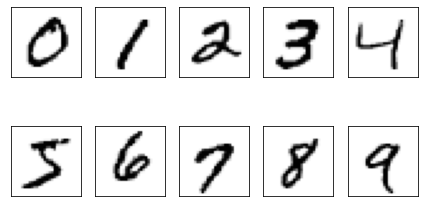

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

__El aspecto de los números es muy diferente, veamos otros ejemplos__:

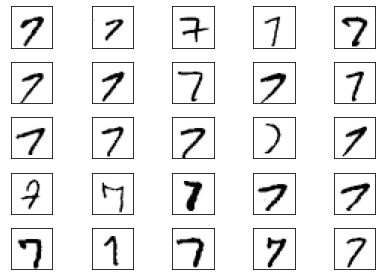

In [7]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

## Efectuar el entrenamiento con el Perceptron multicapa (Multilayer perceptron - MLP)

La librería __sk-learn__ en el módulo __neural_network__ implementa el perceptron multicapa en la clas __MLPClassifier__.

Los parámetros del constructor de la clase __MLPClassifier__ son:
- __hidden_layer_sizes__ : Este parámetro permite establecer el número de capas y el número de nodos que se desean tener en el clasificador de redes neuronales. Cada elemento de la tupla representa el número de nodos en la i-ésima posición, donde i es el índice de la tupla. Por tanto, la longitud de la tupla denota el número total de capas ocultas en la red.
- __max_iter__ : número de épocas de entrenamiento.
- __activation__ : función de activación de las capas ocultas.
- __solver__ : algoritmo empleado en la optimización de los pesos de los nodos.
- __random_state__ : establece una semilla para reproducir los mismos resultados.

In [8]:
len(X_train[0]), np.unique(y_train), len(X_train), len(y_train), len(X_test), len(y_test)

(784,
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 60000,
 60000,
 10000,
 10000)

In [9]:
## Importación de la clase del perceptrón multicapa
from sklearn.neural_network import MLPClassifier
## Inicialización y creación del objeto clasificador
##(784,392,196,98, 49, 10)
mlp = MLPClassifier(hidden_layer_sizes=(784,100, 10), max_iter=20,activation = 'logistic',solver='adam',random_state=1)

In [10]:
## Entrenamiento de la red
mlp.fit(X_train, y_train)

C:\Users\valer_z\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(784, 100, 10),
              max_iter=20, random_state=1)

In [13]:
print("Exactitud del conjunto de entrenamiento: {:.3f}".format(100*mlp.score(X_train, y_train)))
print("Exactitud del conjunto de prueba: {:.3f}".format(100*mlp.score(X_test, y_test)))

Exactitud del conjunto de entrenamiento: 99.548
Exactitud del conjunto de prueba: 97.760


### Se muestran algunos resultados

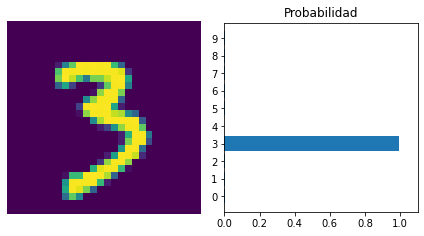

In [14]:
iTest = 30 
probs = mlp.predict_proba([X_test[iTest]])[0]
plotCifra(X_test[iTest], probs)

## Entrenamiento con la maqueta multicapa

### Se entrena la maqueta

In [15]:
capasOcultas=[100]
nn = NeuralNetwork(eta=0.01, epocas=30, hiddenLayers=capasOcultas, minibatch_size=100, shuffle=True, seed=1)
nn.fit(X_train, y_train)

Epoca =====> 1 Coste ====> 131.90564106317095
Epoca =====> 30 Coste ====> 10.742093873312545


### Se comprueba la exactitud en el conjunto de entrenamiento

In [16]:
y_pred= nn.predict(X_train)

In [17]:
from sklearn.metrics import accuracy_score
print('Exactitud - Accuracy: %.4f' % float(100.0*accuracy_score(y_true=y_train, y_pred=y_pred)))

Exactitud - Accuracy: 98.3733


### Se comprueba la precisión en el conjunto de pruebas

In [18]:
y_pred= nn.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
print('Exactitud - Accuracy: %.4f' % float(100.0*accuracy_score(y_true=y_test, y_pred=y_pred)))

Exactitud - Accuracy: 97.2600


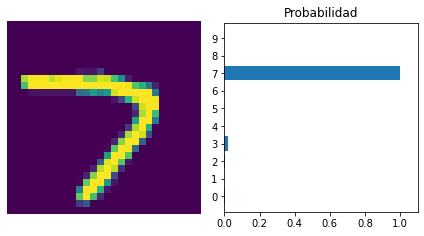

In [20]:
iTest = 70 
probs = nn.predict_proba([X_test[iTest]])[0]
plotCifra(X_test[iTest], probs)